# Machine Learning and Data Science (MALDSAC), FS2024

In this demo, we review the different types of convolutional operations covered so far. Remember that the convolutional operator is a key building block in Convolutional Neural Networks (CNNs).

## Case 1: Transposed Convolution

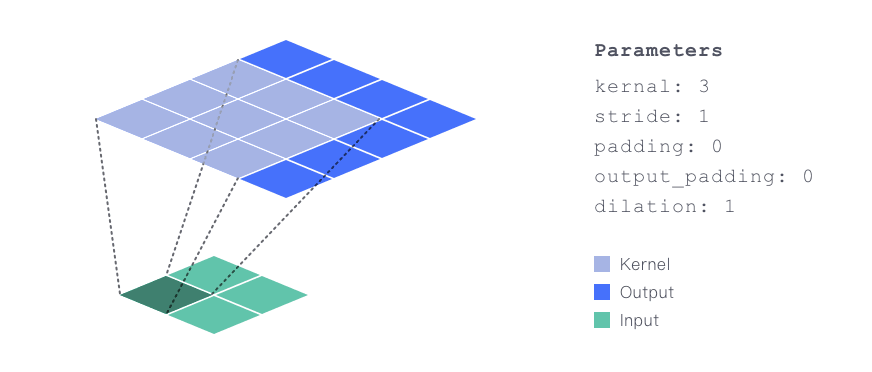

Figure 1 illustrates how a transposed convolutional layer works. Think of it like a fancy calculator that takes a small grid of numbers (let's say 2x2) and stretches it out into a larger grid (in this case, 4x4).

Here's how it works, step by step:

1. **Step 1:** Imagine placing a small grid (let's call it a kernel) of size 3x3 over the input grid.
2. **Step 2:** Multiply the numbers in the kernel with the numbers they cover in the input grid.
3. **Step 3:** Add up all these multiplied numbers.
4. **Step 4:** Move the kernel over a bit (transposing it), and repeat the process until you cover the entire input grid.

By doing this, you're essentially expanding the input grid to a larger size. The animation demonstrates how these steps unfold to create the final, larger output grid.

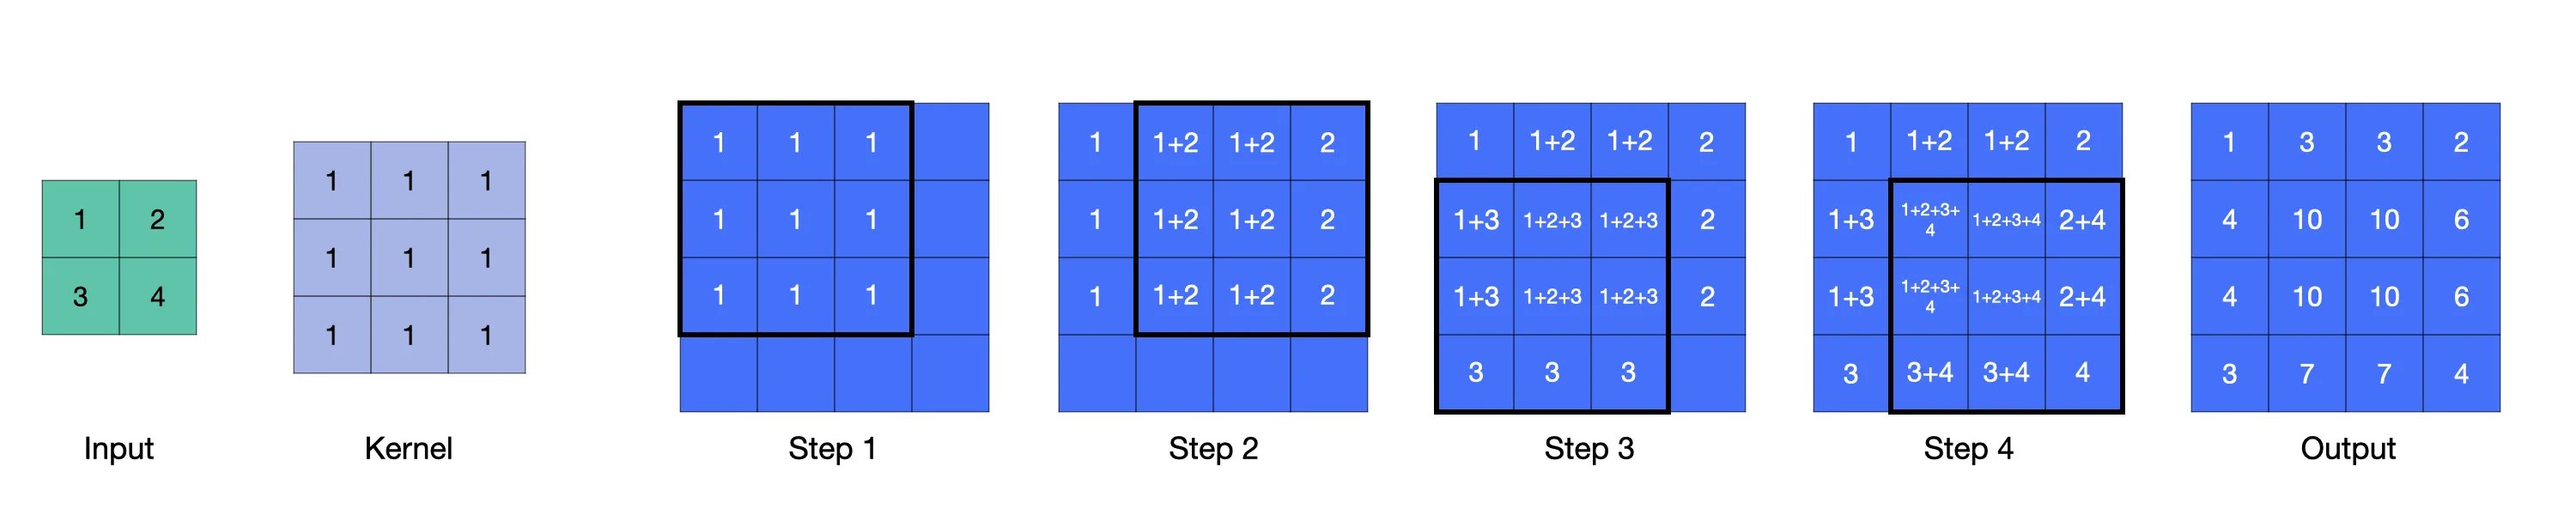

Let's verify the calculation using PyTorch:

In [ ]:
import torch
from torch import nn

# Create 2x2 input tensor
input_data = torch.tensor([[[[1.,2.],[3.,4.]]]])

# Create a Transposed Convolutional Layer with kernel_size=3
transConv1 = nn.ConvTranspose2d(1, 1, 3, bias=False)

# Set kernel weights to be 1
transConv1.weight.data = torch.ones(1,1,3,3)

# Calculate the output
transConv1(input_data)

# Output
# tensor([[[[ 1.,  3.,  3.,  2.],
#           [ 4., 10., 10.,  6.],
#           [ 4., 10., 10.,  6.],
#           [ 3.,  7.,  7.,  4.]]]])

tensor([[[[ 1.,  3.,  3.,  2.],
          [ 4., 10., 10.,  6.],
          [ 4., 10., 10.,  6.],
          [ 3.,  7.,  7.,  4.]]]], grad_fn=<ConvolutionBackward0>)

## Case 2: Stride

Now, let's tweak a setting called "stride" while keeping everything else the same as before.

According to the PyTorch documentation: `Stride basically determines how much the grid jumps each time it moves during the calculation.` Normally, the stride is set to 1, but this time, we'll set it to 2.

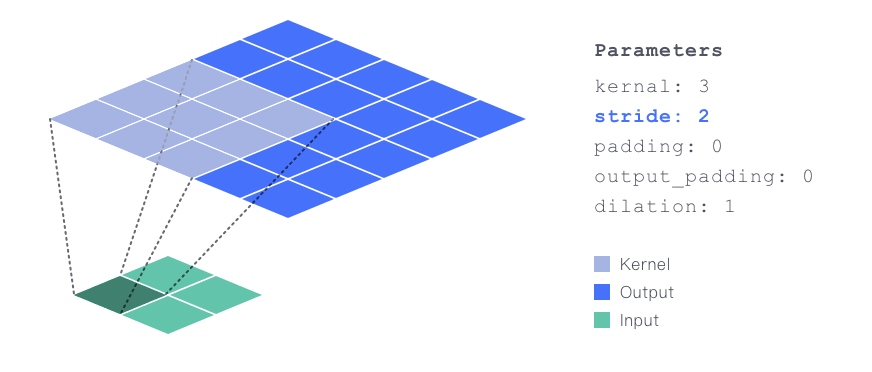

As you observe, following each multiplication step, the kernel matrix shifts two steps horizontally until it reaches the edge. Then, it moves two steps vertically before restarting from the beginning.

Now, let's delve into the manual calculation process:

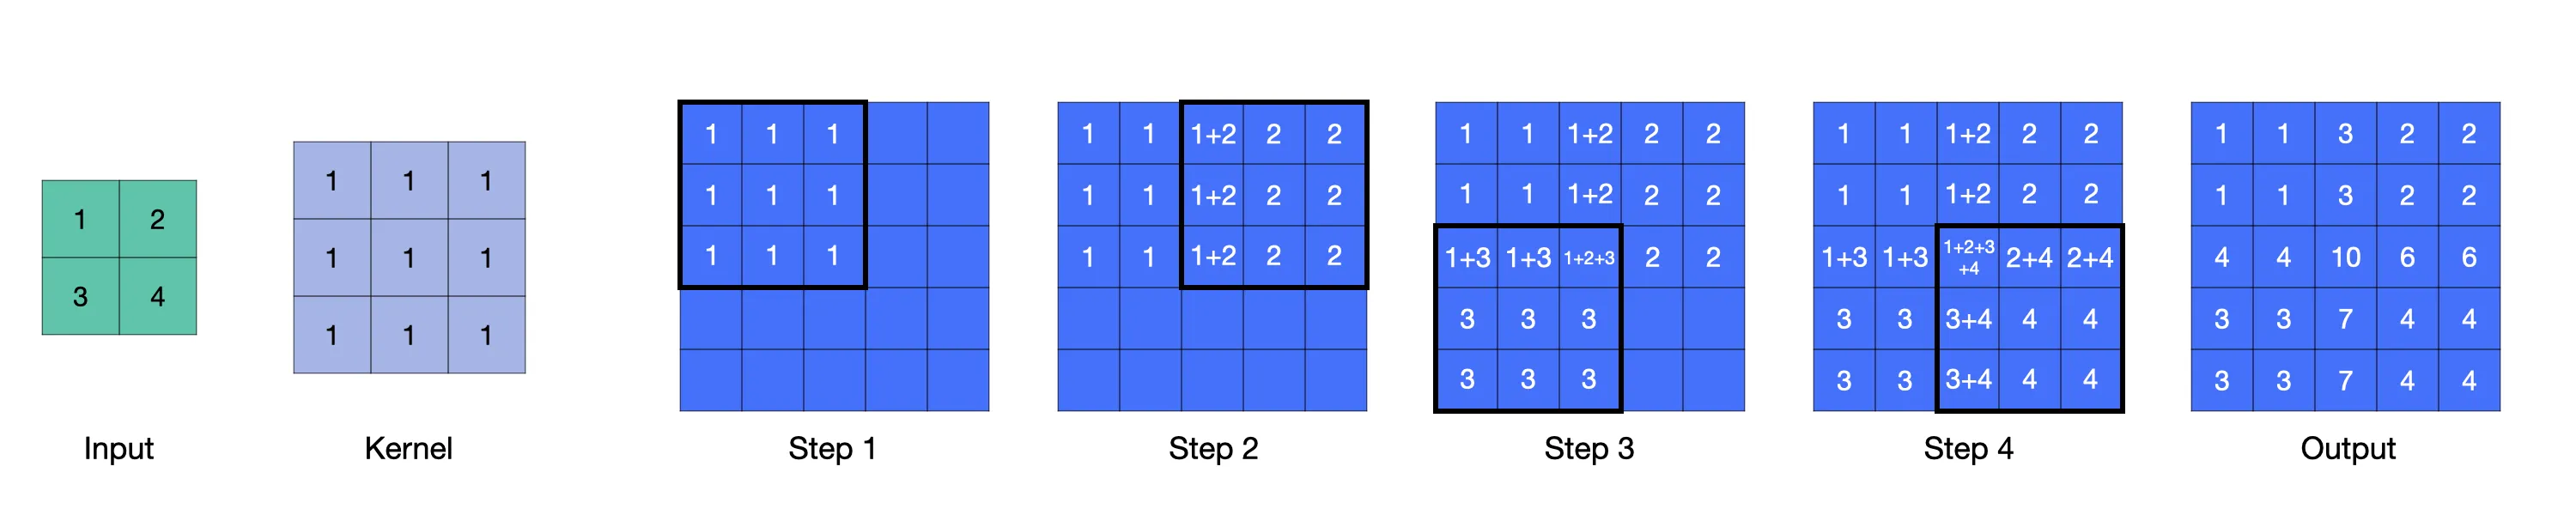

In [ ]:
# Create a Transposed Convolutional Layer with stride=2
transConv2 = nn.ConvTranspose2d(1, 1, 3, stride=2, bias=False)

# Set kernel weights to be 1
transConv2.weight.data = torch.ones(1,1,3,3)

# Calculate
transConv2(input_data)

# Output:
# tensor([[[[ 1.,  1.,  3.,  2.,  2.],
#           [ 1.,  1.,  3.,  2.,  2.],
#           [ 4.,  4., 10.,  6.,  6.],
#           [ 3.,  3.,  7.,  4.,  4.],
#           [ 3.,  3.,  7.,  4.,  4.]]]])

## Case 3: Padding

Now, let's continue from the previous scenario where we adjusted the stride. This time, we'll tweak a setting called "padding" and set it to 1. In previous instances, the padding was automatically set to 0 by default.

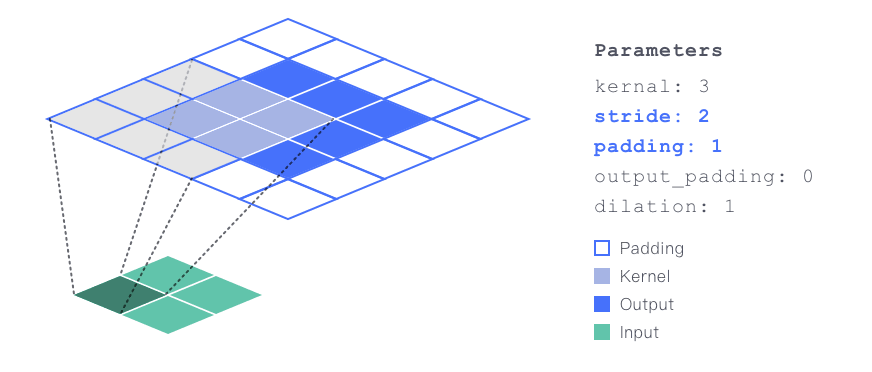

In this case, the ultimate result is the inner 3x3 part of the matrix. Think of it like this: after all the calculations, we simply ignore the outer edges of the matrix. If we were to set the padding to 2, the output would just be a single central cell (1x1), as we'd be ignoring more rows and columns from the edges.

The Figure below displays the manual calculation steps, which closely resemble those in Figure 4. The key difference here is that we've effectively "trimmed off" the outer cells.

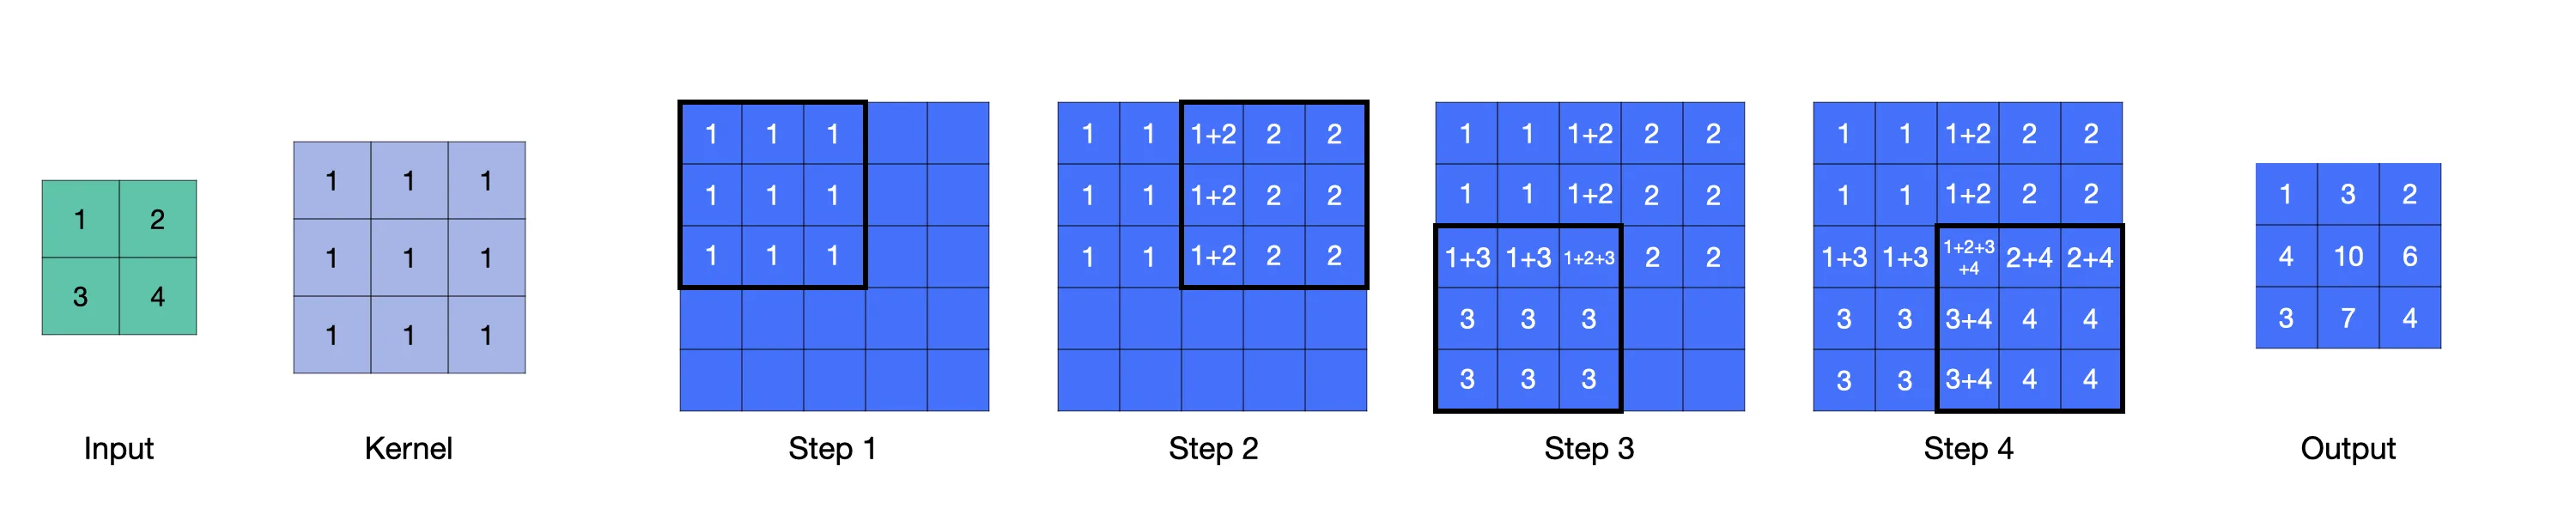

Now, let's use  PyTorch to confirm our observation:

In [ ]:
# Create a TCL layer with stride=2, padding=1
transConv3 = nn.ConvTranspose2d(1, 1, 3, stride=2, padding=1, bias=False)

# Set kernel weights to be 1
transConv3.weight.data = torch.ones(1,1,3,3)

# Calculate
transConv3(input_data)

# Output:
# tensor([[[[ 1.,  3.,  2.],
#           [ 4., 10.,  6.],
#           [ 3.,  7.,  4.]]]])

## Case 4: Output Padding

There are two types of padding: Output Padding and Padding. It's pretty straightforward:

- Output Padding adds extra cells to one side of the output.
- Padding removes cells from both sides of the output.

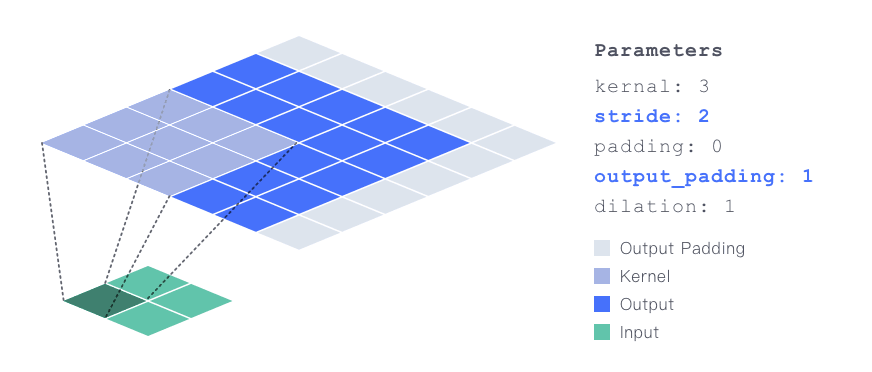

In this scenario, we've set the parameter "output_padding" to 1 (usually it's 0), and the "stride" to 2. As you can see in Figure 7, one side of the output matrix now has extra cells added, all with a value of 0.

If you're finding this a bit tricky to grasp, don't hesitate to compare Figure 7 with Figure 3.

Now, let's walk through the calculations:

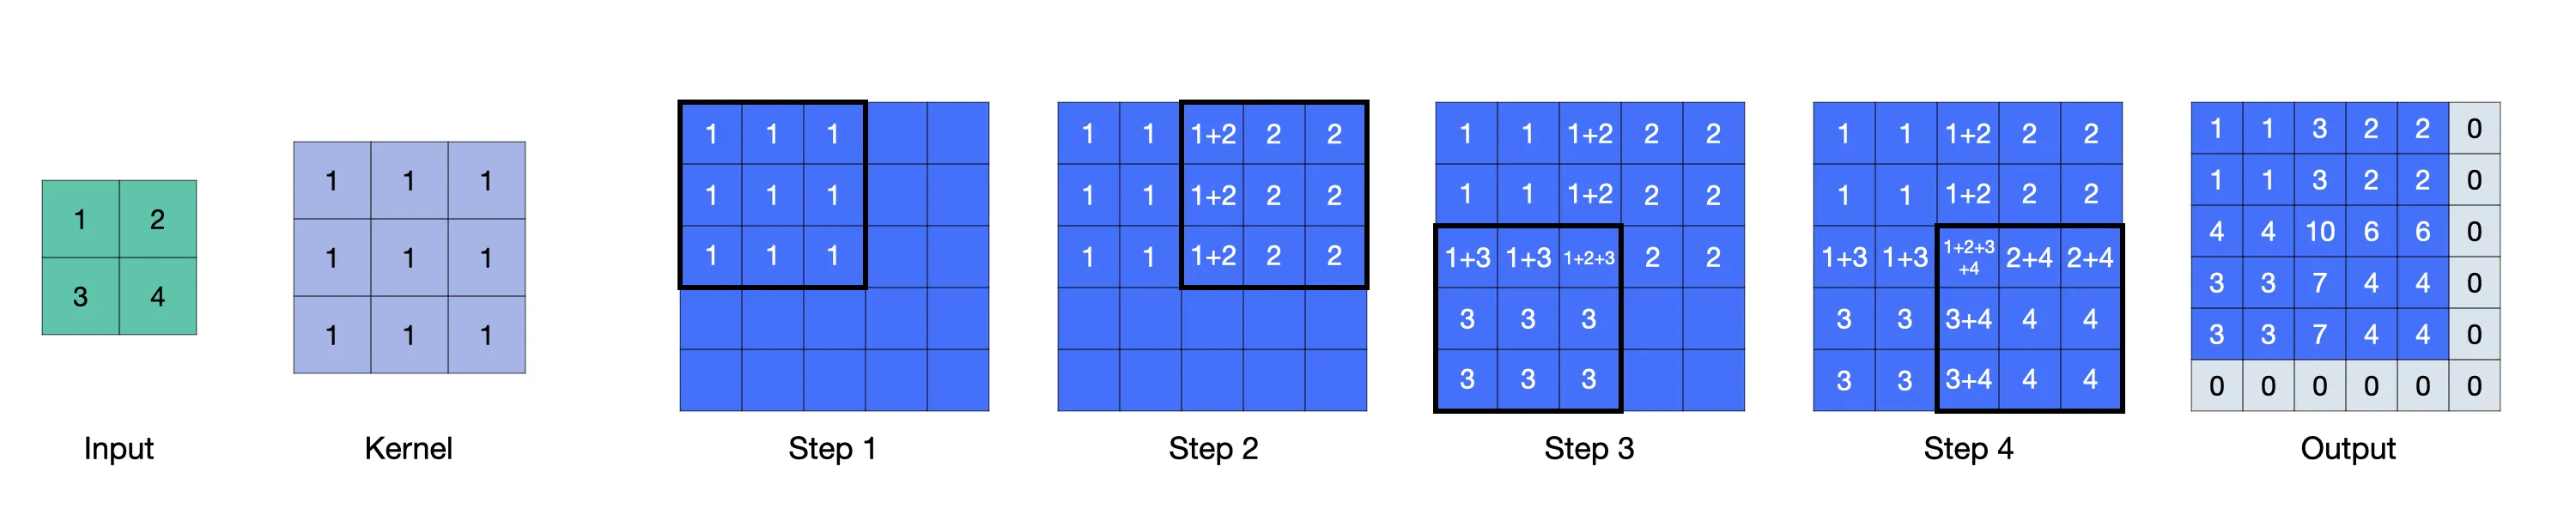

Let’s confirm this with PyTorch:

In [ ]:
# Create a TCL layer with stride=2, output_padding=1
transConv4 = nn.ConvTranspose2d(1, 1, 3, stride=2, output_padding=1, bias=False)

# Set kernel weights to be 1
transConv4.weight.data = torch.ones(1,1,3,3)

# Calculate
transConv4(input_data)

# Output:
# tensor([[[[ 1.,  1.,  3.,  2.,  2.,  0.],
#           [ 1.,  1.,  3.,  2.,  2.,  0.],
#           [ 4.,  4., 10.,  6.,  6.,  0.],
#           [ 3.,  3.,  7.,  4.,  4.,  0.],
#           [ 3.,  3.,  7.,  4.,  4.,  0.],
#           [ 0.,  0.,  0.,  0.,  0.,  0.]]]])

## Case 5: Dilation

Dilation controls the spacing between the points in the kernel.

When I first read this, it felt pretty abstract. But take a look at Figure 9, and it might become clearer. To simplify things, let's stick to a 2x2 kernel for this example. (In earlier examples, we used a 3x3 kernel.)